# ItalianGP - Leclerc 2019 vs 2022

In [1]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.collections import LineCollection
%matplotlib inline

In [2]:
# Enable the cache
ff1.Cache.enable_cache('./cache')

In [3]:
# Load the session data
year, grand_prix, session = 2019, 'Monza', 'R' # could range from “FP1” to “Q” and “R”

In [4]:
race_monza=ff1.get_session(year, grand_prix, session)
race_monza.load()

core           INFO 	Loading data for Italian Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
C:\Users\righi\anaconda3\lib\site-packages\fastf1\core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
C:\Users\righi\anaconda3\lib\site-packages\fastf1\core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
C:\Users\righi\anaconda3\li

In [5]:
race_monza.event

RoundNumber                                                    14
Country                                                     Italy
Location                                                    Monza
OfficialEventName    FORMULA 1 GRAN PREMIO HEINEKEN D’ITALIA 2019
EventDate                                     2019-09-08 00:00:00
EventName                                      Italian Grand Prix
EventFormat                                          conventional
Session1                                               Practice 1
Session1Date                                  2019-09-06 00:00:00
Session2                                               Practice 2
Session2Date                                  2019-09-06 00:00:00
Session3                                               Practice 3
Session3Date                                  2019-09-07 00:00:00
Session4                                               Qualifying
Session4Date                                  2019-09-07 00:00:00
Session5  

In [6]:
lec = race_monza.laps.pick_driver('LEC')

In [7]:
lec.info()

<class 'fastf1.core.Laps'>
Int64Index: 53 entries, 0 to 52
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                53 non-null     timedelta64[ns]
 1   DriverNumber        53 non-null     object         
 2   LapTime             52 non-null     timedelta64[ns]
 3   LapNumber           53 non-null     int64          
 4   PitOutTime          2 non-null      timedelta64[ns]
 5   PitInTime           1 non-null      timedelta64[ns]
 6   Sector1Time         52 non-null     timedelta64[ns]
 7   Sector2Time         53 non-null     timedelta64[ns]
 8   Sector3Time         53 non-null     timedelta64[ns]
 9   Sector1SessionTime  52 non-null     timedelta64[ns]
 10  Sector2SessionTime  53 non-null     timedelta64[ns]
 11  Sector3SessionTime  53 non-null     timedelta64[ns]
 12  SpeedI1             45 non-null     float64        
 13  SpeedI2             53 non-null     float64     

In [8]:
colormap = mpl.cm.plasma

In [9]:
lap = lec.pick_fastest()

# Get telemetry data
x = lap.telemetry['X']              # values for x-axis
y = lap.telemetry['Y']              # values for y-axis
color = lap.telemetry['Speed']      # value to base color gradient on

C:\Users\righi\anaconda3\lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
C:\Users\righi\anaconda3\lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
C:\Users\righi\anaconda3\lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. T

C:\Users\righi\anaconda3\lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
C:\Users\righi\anaconda3\lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
C:\Users\righi\anaconda3\lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. T

In [10]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

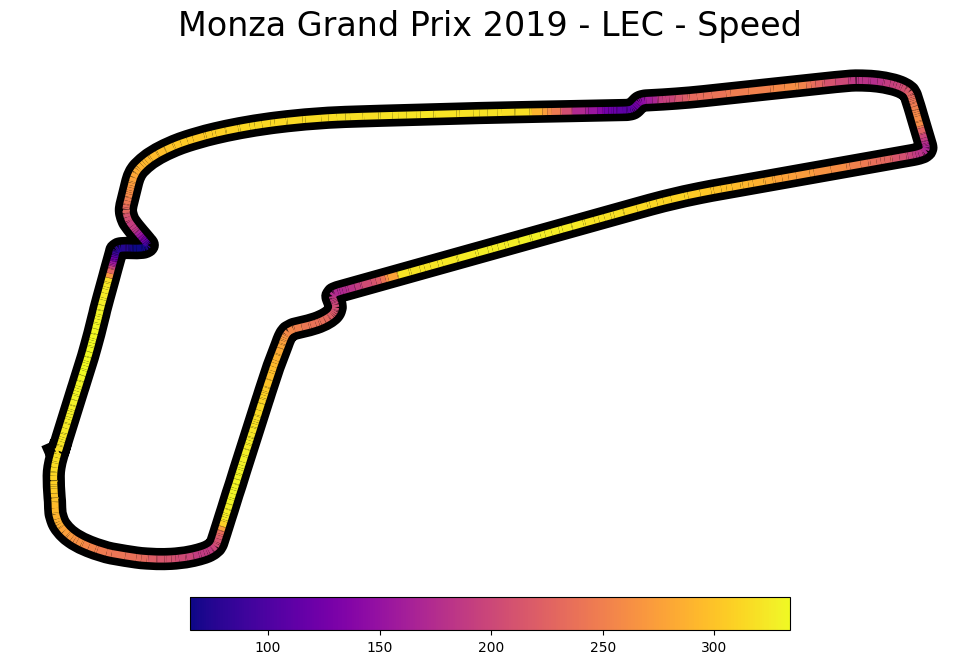

In [11]:
# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig.suptitle("Monza Grand Prix 2019 - LEC - Speed", size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')


# After this, we plot the data itself.
# Create background track line
ax.plot(lap.telemetry['X'], lap.telemetry['Y'], color='black', linestyle='-', linewidth=16, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap, orientation="horizontal")


# Show the plot
plt.show()

In [12]:
# Load the session data
year, grand_prix, session = 2019, 'Monza', 'Q' # could range from “FP1” to “Q” and “R"

In [13]:
race_monza=ff1.get_session(year, grand_prix, session)
race_monza.load()

core           INFO 	Loading data for Italian Grand Prix - Qualifying [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
C:\Users\righi\anaconda3\lib\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
C:\Users\righi\anaconda3\lib\site-packages\fastf1\core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
C:\Users\righi\anaconda3\lib\site-packages\fastf1\core.py:1415: FutureWarning: In a future version, 

In [14]:
race_monza.event

RoundNumber                                                    14
Country                                                     Italy
Location                                                    Monza
OfficialEventName    FORMULA 1 GRAN PREMIO HEINEKEN D’ITALIA 2019
EventDate                                     2019-09-08 00:00:00
EventName                                      Italian Grand Prix
EventFormat                                          conventional
Session1                                               Practice 1
Session1Date                                  2019-09-06 00:00:00
Session2                                               Practice 2
Session2Date                                  2019-09-06 00:00:00
Session3                                               Practice 3
Session3Date                                  2019-09-07 00:00:00
Session4                                               Qualifying
Session4Date                                  2019-09-07 00:00:00
Session5  

In [15]:
lec = race_monza.laps.pick_driver('LEC')

In [16]:
lec.info()

<class 'fastf1.core.Laps'>
Int64Index: 18 entries, 0 to 17
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                18 non-null     timedelta64[ns]
 1   DriverNumber        18 non-null     object         
 2   LapTime             9 non-null      timedelta64[ns]
 3   LapNumber           18 non-null     int64          
 4   PitOutTime          6 non-null      timedelta64[ns]
 5   PitInTime           6 non-null      timedelta64[ns]
 6   Sector1Time         11 non-null     timedelta64[ns]
 7   Sector2Time         16 non-null     timedelta64[ns]
 8   Sector3Time         15 non-null     timedelta64[ns]
 9   Sector1SessionTime  11 non-null     timedelta64[ns]
 10  Sector2SessionTime  16 non-null     timedelta64[ns]
 11  Sector3SessionTime  15 non-null     timedelta64[ns]
 12  SpeedI1             16 non-null     float64        
 13  SpeedI2             16 non-null     float64     

In [17]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

In [18]:
lap = lec.pick_fastest()

# Get telemetry data
x = lap.telemetry['X']              # values for x-axis
y = lap.telemetry['Y']              # values for y-axis
color = lap.telemetry['Speed']      # value to base color gradient on

C:\Users\righi\anaconda3\lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
C:\Users\righi\anaconda3\lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
C:\Users\righi\anaconda3\lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. T

C:\Users\righi\anaconda3\lib\site-packages\fastf1\core.py:508: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  merged.loc[:, col] = merged.loc[:, col].astype(dtype_map[col])
C:\Users\righi\anaconda3\lib\site-packages\fastf1\core.py:584: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ret.loc[:, ch] = ret.loc[:, ch].ffill().ffill().bfill()
C:\Users\righi\anaconda3\lib\site-packages\fastf1\core.py:508: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the ol

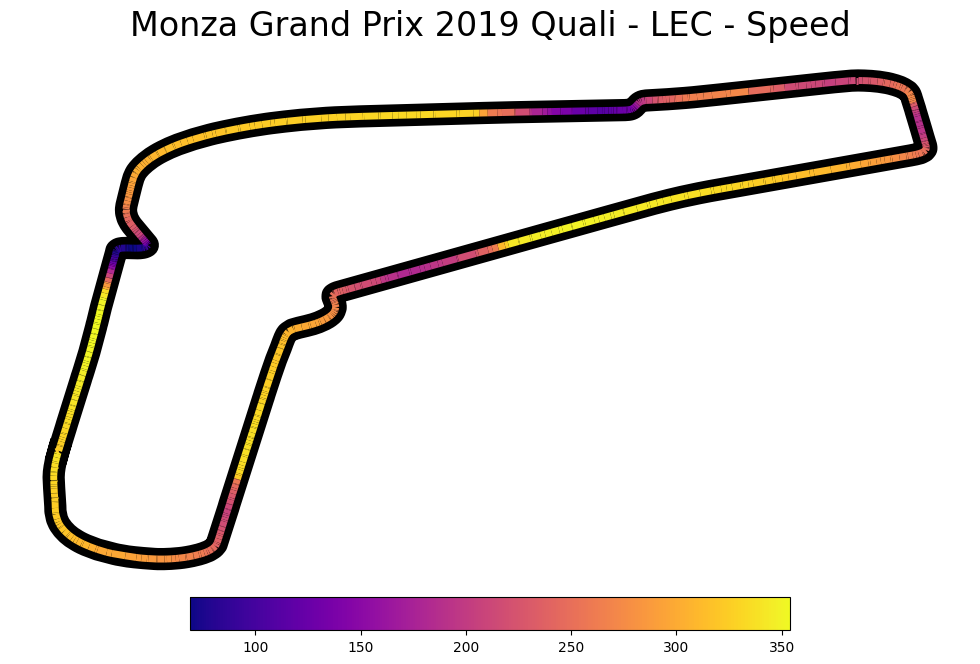

In [19]:
# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig.suptitle("Monza Grand Prix 2019 Quali - LEC - Speed", size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')


# After this, we plot the data itself.
# Create background track line
ax.plot(lap.telemetry['X'], lap.telemetry['Y'], color='black', linestyle='-', linewidth=16, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap, orientation="horizontal")


# Show the plot
plt.show()

In [20]:
# Load the session data
year, grand_prix, session = 2022, 'Monza', 'R' # could range from “FP1” to “Q” and “R”

In [21]:
race_monza=ff1.get_session(year, grand_prix, session)
race_monza.load()

core           INFO 	Loading data for Italian Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
C:\Users\righi\anaconda3\lib\site-packages\fastf1\core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
C:\Users\righi\anaconda3\lib\site-packages\fastf1\core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
C:\Users\righi\anaconda3\li

In [22]:
race_monza.event

RoundNumber                                                   16
Country                                                    Italy
Location                                                   Monza
OfficialEventName    FORMULA 1 PIRELLI GRAN PREMIO D’ITALIA 2022
EventDate                                    2022-09-11 17:00:00
EventName                                     Italian Grand Prix
EventFormat                                         conventional
Session1                                              Practice 1
Session1Date                                 2022-09-09 14:00:00
Session2                                              Practice 2
Session2Date                                 2022-09-09 17:00:00
Session3                                              Practice 3
Session3Date                                 2022-09-10 13:00:00
Session4                                              Qualifying
Session4Date                                 2022-09-10 16:00:00
Session5                 

In [23]:
lec = race_monza.laps.pick_driver('LEC')

In [24]:
lec.info()

<class 'fastf1.core.Laps'>
Int64Index: 53 entries, 53 to 105
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                53 non-null     timedelta64[ns]
 1   DriverNumber        53 non-null     object         
 2   LapTime             52 non-null     timedelta64[ns]
 3   LapNumber           53 non-null     int64          
 4   PitOutTime          4 non-null      timedelta64[ns]
 5   PitInTime           3 non-null      timedelta64[ns]
 6   Sector1Time         52 non-null     timedelta64[ns]
 7   Sector2Time         53 non-null     timedelta64[ns]
 8   Sector3Time         53 non-null     timedelta64[ns]
 9   Sector1SessionTime  52 non-null     timedelta64[ns]
 10  Sector2SessionTime  53 non-null     timedelta64[ns]
 11  Sector3SessionTime  53 non-null     timedelta64[ns]
 12  SpeedI1             42 non-null     float64        
 13  SpeedI2             53 non-null     float64   

In [25]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

In [26]:
lap = lec.pick_fastest()

# Get telemetry data
x = lap.telemetry['X']              # values for x-axis
y = lap.telemetry['Y']              # values for y-axis
color = lap.telemetry['Speed']      # value to base color gradient on

C:\Users\righi\anaconda3\lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
C:\Users\righi\anaconda3\lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
C:\Users\righi\anaconda3\lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. T

C:\Users\righi\anaconda3\lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
C:\Users\righi\anaconda3\lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
C:\Users\righi\anaconda3\lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. T

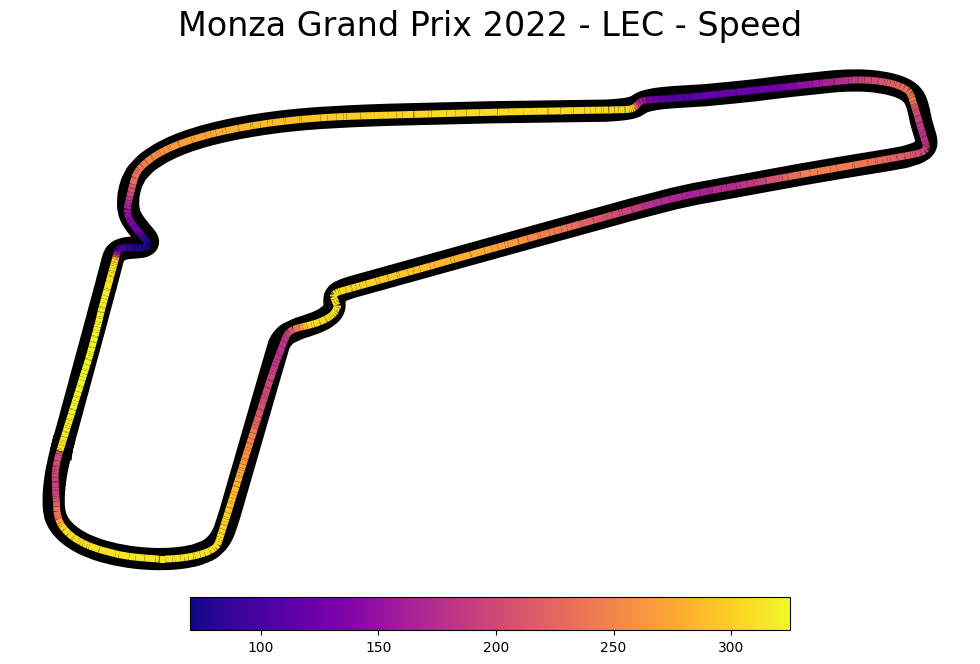

In [27]:
# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig.suptitle("Monza Grand Prix 2022 - LEC - Speed", size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')


# After this, we plot the data itself.
# Create background track line
ax.plot(lap.telemetry['X'], lap.telemetry['Y'], color='black', linestyle='-', linewidth=16, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap, orientation="horizontal")


# Show the plot
plt.show()

In [28]:
# Load the session data
year, grand_prix, session = 2022, 'Monza', 'Q' # could range from “FP1” to “Q” and “R”

In [29]:
race_monza=ff1.get_session(year, grand_prix, session)
race_monza.load()

core           INFO 	Loading data for Italian Grand Prix - Qualifying [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
C:\Users\righi\anaconda3\lib\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
C:\Users\righi\anaconda3\lib\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
C:\Users\righi\anaconda3\lib\site-packages\fastf1\core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions wi

In [30]:
lec = race_monza.laps.pick_driver('LEC')

In [31]:
lec.info()

<class 'fastf1.core.Laps'>
Int64Index: 13 entries, 0 to 12
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                13 non-null     timedelta64[ns]
 1   DriverNumber        13 non-null     object         
 2   LapTime             9 non-null      timedelta64[ns]
 3   LapNumber           13 non-null     int64          
 4   PitOutTime          4 non-null      timedelta64[ns]
 5   PitInTime           3 non-null      timedelta64[ns]
 6   Sector1Time         9 non-null      timedelta64[ns]
 7   Sector2Time         13 non-null     timedelta64[ns]
 8   Sector3Time         13 non-null     timedelta64[ns]
 9   Sector1SessionTime  9 non-null      timedelta64[ns]
 10  Sector2SessionTime  13 non-null     timedelta64[ns]
 11  Sector3SessionTime  13 non-null     timedelta64[ns]
 12  SpeedI1             13 non-null     float64        
 13  SpeedI2             13 non-null     float64     

In [32]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

In [33]:
lap = lec.pick_fastest()

# Get telemetry data
x = lap.telemetry['X']              # values for x-axis
y = lap.telemetry['Y']              # values for y-axis
color = lap.telemetry['Speed']      # value to base color gradient on

C:\Users\righi\anaconda3\lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
C:\Users\righi\anaconda3\lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
C:\Users\righi\anaconda3\lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. T

C:\Users\righi\anaconda3\lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
C:\Users\righi\anaconda3\lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
C:\Users\righi\anaconda3\lib\site-packages\fastf1\core.py:508: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. T

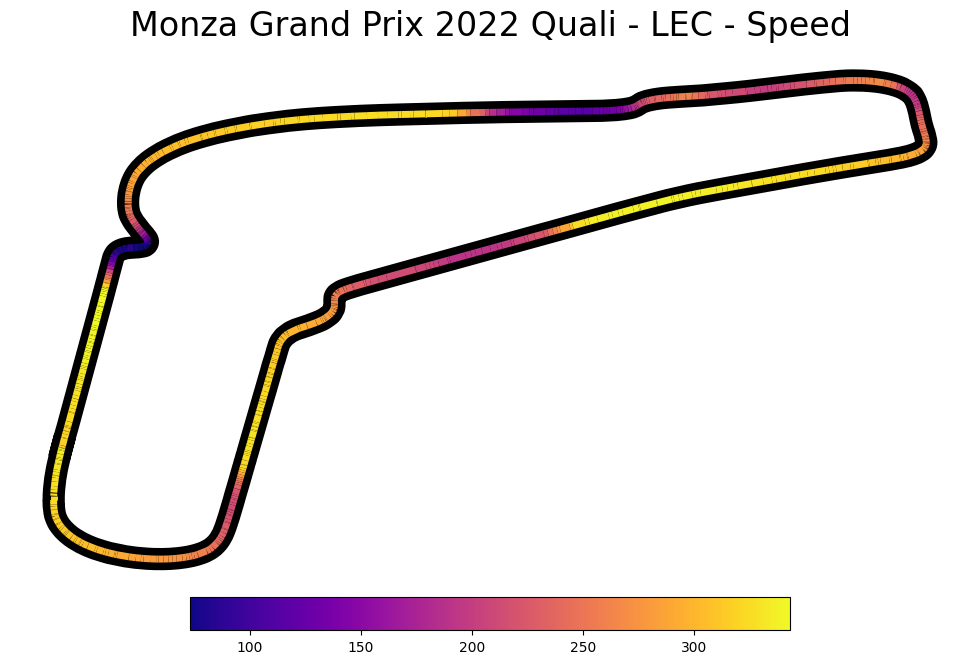

In [34]:
# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig.suptitle("Monza Grand Prix 2022 Quali - LEC - Speed", size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')


# After this, we plot the data itself.
# Create background track line
ax.plot(lap.telemetry['X'], lap.telemetry['Y'], color='black', linestyle='-', linewidth=16, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap, orientation="horizontal")


# Show the plot
plt.show()